# Task 3

Link to the datasets: https://arielacil-my.sharepoint.com/:u:/g/personal/rand_ariel_ac_il/EbcKOLRNLExFvxcOCpESGLMBRlP1f5WhX9EIpZJ7qAXi9g?e=tAycKc

**Dataset_3** - Same as before but this time the dataset includes more complex parameters in any request making it more authentic but also making it much harder to simply "plug and play" on any machine learning model. According to the model you choose some of you may need to approach the data exploration and feature extraction differently.
```
Dataset 3 baseline score - Label phase:

                   precision    recall  f1-score   support

    Benign          0.95715   0.97607   0.96652     30209
    Malware         0.77364   0.65181   0.70752      3791

    accuracy                            0.93991     34000
    macro avg       0.86539   0.81394   0.83702     34000
    weighted avg    0.93669   0.93991   0.93764     34000
    
```

```
Dataset 3 baseline score - Attack Type phase:

                     precision    recall  f1-score   support

             Benign    0.95649   0.97705   0.96666     22659
   Cookie Injection    1.00000   0.99829   0.99914       584
Directory Traversal    0.17021   0.11511   0.13734       278
              LOG4J    0.87582   0.48201   0.62181       278
        Log Forging    0.33333   0.15194   0.20874       283
                RCE    0.98582   0.98582   0.98582       282
      SQL Injection    0.68499   0.58169   0.62913       557
                XSS    0.78584   0.74144   0.76300       584

           accuracy                        0.93966     25505
          macro avg    0.72406   0.62917   0.66395     25505
       weighted avg    0.93161   0.93966   0.93438     25505
```

# Cisco - Ariel University API Security Detection Challenge 2023
## Baseline code


### Imports and global settings

In [1]:
# Imports, settings and first dataset view
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.decomposition import TruncatedSVD

import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as ps
import matplotlib.pyplot as plt
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.templates['plotly_dark'].layout.autosize = False
pio.templates['plotly_dark'].layout.width = 1_000
pio.templates['plotly_dark'].layout.height = 800

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import StackingClassifier

import pickle

# from ipywidgets import widgets

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 3  # Options are [1, 2, 3, 4]
test_type = 'attack_type'  # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Shoe the first five lines of the dataframe to see if everything was read accordingly
df.head()

request.headers.Host                         request.headers.User-Agent  \
0       127.0.0.1:5000                             python-requests/2.28.1   
1       127.0.0.1:5000  Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...   
2       127.0.0.1:5000  Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...   
3       127.0.0.1:5000  Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...   
4       127.0.0.1:5000  Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...   

  request.headers.Accept-Encoding request.headers.Accept  \
0                   gzip, deflate                    */*   
1               gzip, deflate, br                    */*   
2               gzip, deflate, br                    */*   
3               gzip, deflate, br                    */*   
4               gzip, deflate, br                    */*   

  request.headers.Connection request.method  \
0                 keep-alive            GET   
1                 keep-alive            GET   
2                 keep-alive            GET   
3                 keep-alive            GET   
4                 keep-alive            GET   

                                         request.url request.body  \
0  http://127.0.0.1:5000/bookstore/signup?usernam...                
1  http://127.0.0.1:5000/forum?message=%3C%2Fp%3E...                
2  http://127.0.0.1:5000/about/greet?resource_id=...                
3        http://127.0.0.1:5000/orders/get/ship_via/3                
4  http://127.0.0.1:5000/about/greet?resource_id=...                

   response.status response.headers.Content-Type  \
0  400 BAD REQUEST              application/json   
1        302 FOUND      text/html; charset=utf-8   
2           200 OK      text/html; charset=utf-8   
3           200 OK              application/json   
4           200 OK      text/html; charset=utf-8   

  response.headers.Content-Length  response.status_code  \
0                              76                   400   
1                             199                   302   
2                             546                   200   
3                             343                   200   
4                             376                   200   

                                       response.body  \
0  {"message": "This username is already taken, p...   
1                           text/html; charset=utf-8   
2                           text/html; charset=utf-8   
3  {"customer_id": "VINET", "employee_id": "5", "...   
4                           text/html; charset=utf-8   

  request.headers.Accept-Language request.headers.Sec-Fetch-Site  \
0                             NaN                            NaN   
1         en-US,en;q=0.9,he;q=0.8                           none   
2                           de-CH                           none   
3                  en-US,en;q=0.5                           none   
4                              de                           none   

  request.headers.Sec-Fetch-Mode request.headers.Sec-Fetch-User  \
0                            NaN                            NaN   
1                    same-origin                             ?1   
2                      websocket                             ?1   
3                    same-origin                             ?1   
4                    same-origin                             ?1   

  request.headers.Sec-Fetch-Dest  \
0                            NaN   
1                       document   
2                       document   
3                       document   
4                       document   

                          request.headers.Set-Cookie  \
0                                                NaN   
1  ['ck=N6BKSYvbHZ-c7Nvn6ITB2Q7yJddttJSdw-LNw7PIJ...   
2  ['ck=W8ONnD95GriBOMxq2rHpMUXFIHT5bKv0QPZiOea0E...   
3  ['ck=ms3dG65An9Vqx-2x--24w_j8ro90Bpp9gqZJVM03I...   
4  ['ck=7mBcmslAl5Fpg5jiXWtM8qSZUhGIwFLP1sBYSUMvk...   

            request.headers.Date request.Attack_Tag response.headers.Location  \
0                           

### Basic dataset label arrangements

In [3]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns
# You can use this snippet to run your own lambda on any data with the apply() method


def categorize(row):
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'


df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

df

request.headers.Host  \
0            127.0.0.1:5000   
1            127.0.0.1:5000   
2            127.0.0.1:5000   
3            127.0.0.1:5000   
4            127.0.0.1:5000   
...                     ...   
144495       127.0.0.1:5000   
144496       127.0.0.1:5000   
144497       127.0.0.1:5000   
144498       127.0.0.1:5000   
144499       127.0.0.1:5000   

                               request.headers.User-Agent  \
0                                  python-requests/2.28.1   
1       Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...   
2       Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...   
3       Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...   
4       Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...   
...                                                   ...   
144495                             python-requests/2.28.1   
144496  Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/53...   
144497  Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537....   
144498  Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/53...   
144499  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   

       request.headers.Accept-Encoding request.headers.Accept  \
0                        gzip, deflate                    */*   
1                    gzip, deflate, br                    */*   
2                    gzip, deflate, br                    */*   
3                    gzip, deflate, br                    */*   
4                    gzip, deflate, br                    */*   
...                                ...                    ...   
144495                   gzip, deflate                    */*   
144496               gzip, deflate, br                    */*   
144497               gzip, deflate, br                    */*   
144498               gzip, deflate, br                    */*   
144499               gzip, deflate, br                    */*   

       request.headers.Connection request.method  \
0                      keep-alive            GET   
1                      keep-alive            GET   
2                      keep-alive            GET   
3                      keep-alive            GET   
4                      keep-alive            GET   
...                           ...            ...   
144495                 keep-alive            GET   
144496                 keep-alive            GET   
144497                 keep-alive            GET   
144498                 keep-alive            GET   
144499                 keep-alive            GET   

                                              request.url request.body  \
0       http://127.0.0.1:5000/bookstore/signup?usernam...                
1       http://127.0.0.1:5000/forum?message=%3C%2Fp%3E...                
2       http://127.0.0.1:5000/about/greet?resource_id=...                
3             http://127.0.0.1:5000/orders/get/ship_via/3                
4       http://127.0.0.1:5000/about/greet?resource_id=...                
...                                                   ...          ...   
144495  http://127.0.0.1:5000/bookstore/signup?usernam...                
144496  http://127.0.0.1:5000/states/Amy?id=8408766.17...                
144497  http://127.0.0.1:5000/orders/get/country?count...                
144498  http://127.0.0.1:5000/orders/check/exists?val=...                
144499  http://127.0.0.1:5000/?res_id=rYLzpXxTz4d7RhvJ...                

         response.status response.headers.Content-Type  \
0        400 BAD REQUEST              application/json   
1              302 FOUND      text/html; charset=utf-8   
2                 200 OK      text/html; charset=utf-8   
3                 200 OK              application/json   
4                 200 OK      text/html; charset=utf-8   
...                  ...                           ...   
144495   400 BAD REQUEST              application/json   
144496     404 NOT FOUND              application/json   
144497     404 NOT FOUND              application/json   
144498  401 UNAUTHORIZED  

In [4]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144500 entries, 0 to 144499
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   request.headers.Host             144500 non-null  object
 1   request.headers.User-Agent       144500 non-null  object
 2   request.headers.Accept-Encoding  144500 non-null  object
 3   request.headers.Accept           144500 non-null  object
 4   request.headers.Connection       144500 non-null  object
 5   request.method                   144500 non-null  object
 6   request.url                      144500 non-null  object
 7   request.body                     144500 non-null  object
 8   response.status                  144500 non-null  object
 9   response.headers.Content-Type    144500 non-null  object
 10  response.headers.Content-Length  144500 non-null  object
 11  response.status_code             144500 non-null  int64 
 12  response.body   

In [5]:
list_of_nan_for_more_than_90 = []
for col in df.columns:
    if df[col].isna().sum() / df.shape[0] * 100 > 90:
        list_of_nan_for_more_than_90.append(col)
        print(f"Column {col} has {df[col].isna().sum()} NaN values, which is {round(df[col].isna().sum() / df.shape[0] * 100, 2)}%, and has {df[col].nunique()} unique values")

Column response.headers.Location has 135951 NaN values, which is 94.08%, and has 5255 unique values
Column request.headers.Content-Length has 137677 NaN values, which is 95.28%, and has 14 unique values
Column request.headers.Cookie has 141256 NaN values, which is 97.76%, and has 38 unique values
Column response.headers.Set-Cookie has 142883 NaN values, which is 98.88%, and has 1 unique values


In [6]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    df[column] = df[column].fillna('None')

# If you want to detect columns that may have only some NaN values use this:
# df.loc[:, df.isna().any()].tolist()

df.head()

request.headers.Host                         request.headers.User-Agent  \
0       127.0.0.1:5000                             python-requests/2.28.1   
1       127.0.0.1:5000  Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...   
2       127.0.0.1:5000  Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...   
3       127.0.0.1:5000  Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...   
4       127.0.0.1:5000  Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...   

  request.headers.Accept-Encoding request.headers.Accept  \
0                   gzip, deflate                    */*   
1               gzip, deflate, br                    */*   
2               gzip, deflate, br                    */*   
3               gzip, deflate, br                    */*   
4               gzip, deflate, br                    */*   

  request.headers.Connection request.method  \
0                 keep-alive            GET   
1                 keep-alive            GET   
2                 keep-alive            GET   
3                 keep-alive            GET   
4                 keep-alive            GET   

                                         request.url request.body  \
0  http://127.0.0.1:5000/bookstore/signup?usernam...                
1  http://127.0.0.1:5000/forum?message=%3C%2Fp%3E...                
2  http://127.0.0.1:5000/about/greet?resource_id=...                
3        http://127.0.0.1:5000/orders/get/ship_via/3                
4  http://127.0.0.1:5000/about/greet?resource_id=...                

   response.status response.headers.Content-Type  \
0  400 BAD REQUEST              application/json   
1        302 FOUND      text/html; charset=utf-8   
2           200 OK      text/html; charset=utf-8   
3           200 OK              application/json   
4           200 OK      text/html; charset=utf-8   

  response.headers.Content-Length  response.status_code  \
0                              76                   400   
1                             199                   302   
2                             546                   200   
3                             343                   200   
4                             376                   200   

                                       response.body  \
0  {"message": "This username is already taken, p...   
1                           text/html; charset=utf-8   
2                           text/html; charset=utf-8   
3  {"customer_id": "VINET", "employee_id": "5", "...   
4                           text/html; charset=utf-8   

  request.headers.Accept-Language request.headers.Sec-Fetch-Site  \
0                            None                           None   
1         en-US,en;q=0.9,he;q=0.8                           none   
2                           de-CH                           none   
3                  en-US,en;q=0.5                           none   
4                              de                           none   

  request.headers.Sec-Fetch-Mode request.headers.Sec-Fetch-User  \
0                           None                           None   
1                    same-origin                             ?1   
2                      websocket                             ?1   
3                    same-origin                             ?1   
4                    same-origin                             ?1   

  request.headers.Sec-Fetch-Dest  \
0                           None   
1                       document   
2                       document   
3                       document   
4                       document   

                          request.headers.Set-Cookie  \
0                                               None   
1  ['ck=N6BKSYvbHZ-c7Nvn6ITB2Q7yJddttJSdw-LNw7PIJ...   
2  ['ck=W8ONnD95GriBOMxq2rHpMUXFIHT5bKv0QPZiOea0E...   
3  ['ck=ms3dG65An9Vqx-2x--24w_j8ro90Bpp9gqZJVM03I...   
4  ['ck=7mBcmslAl5Fpg5jiXWtM8qSZUhGIwFLP1sBYSUMvk...   

            request.headers.Date response.headers.Location  \
0                           None               

In [7]:
# Detect columns that have the same value for all rows and print them
from collections import Counter
for column in df.columns:
    if len(Counter(df[column])) == 1:
        print(column)

request.headers.Host
request.headers.Accept
request.headers.Connection


In [8]:
# Setting features for further feature extraction by choosing columns
# Some will be "simply" encoded via label encoding and others with HashingVectorizer

# On these headers we will run a "simple" BOW
SIMPLE_HEADERS = ['request.headers.Accept-Encoding',
                  'request.headers.Host',
                  'request.method',
                  'request.headers.Accept-Language',
                  'request.headers.Sec-Fetch-Site',
                  'request.headers.Sec-Fetch-Mode',
                  'request.headers.Sec-Fetch-Dest',
                  'request.headers.Sec-Fetch-User',
                  'response.status',
                  ]

# On these headers we will run HashingVectorizer
COMPLEX_HEADERS = ['request.headers.User-Agent',
                   'request.headers.Set-Cookie',
                   'request.headers.Date',
                   'request.url',
                   'response.headers.Content-Type',
                   'response.body',
                   'response.headers.Location',
                   'request.headers.Content-Length',
                   'request.headers.Cookie',
                   'response.headers.Set-Cookie'
                   ]

COLUMNS_TO_REMOVE = ['request.body',
                     'response.headers.Content-Length',
                     'request.headers.Date',
                     'request.headers.Accept',
                     'request.headers.Connection',
                     ]

# This is our main preprocessing function that will iterate over all of the chosen
# columns and run some feature extraction models


def vectorize_df(df):
    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=4)

    # Run LabelEncoder on the chosen features
    for column in SIMPLE_HEADERS:
        df[column] = le.fit_transform(df[column])

    # Run HashingVectorizer on the chosen features
    for column in COMPLEX_HEADERS:
        newHVec = h_vec.fit_transform(df[column])
        df[column] = newHVec.todense()

    # Remove some columns that may be needed.. (Or not, you decide)
    for column in COLUMNS_TO_REMOVE:
        df.drop(column, axis=1, inplace=True)
    return df

df = vectorize_df(df)
df.head()

request.headers.Host  request.headers.User-Agent  \
0                     0                    0.577350   
1                     0                    0.258199   
2                     0                   -0.471405   
3                     0                    0.000000   
4                     0                    0.000000   

   request.headers.Accept-Encoding  request.method  request.url  \
0                                0               0     0.666667   
1                                1               0     0.480384   
2                                1               0     0.816497   
3                                1               0     0.500000   
4                                1               0     0.554700   

   response.status  response.headers.Content-Type  response.status_code  \
0                3                           -1.0                   400   
1                1                           -1.0                   302   
2                0                           -1.0                   200   
3                0                           -1.0                   200   
4                0                           -1.0                   200   

   response.body  request.headers.Accept-Language  \
0       0.816497                                0   
1      -1.000000                                4   
2      -1.000000                                2   
3      -0.115470                                3   
4      -1.000000                                1   

   request.headers.Sec-Fetch-Site  request.headers.Sec-Fetch-Mode  \
0                               0                               0   
1                               1                               1   
2                               1                               2   
3                               1                               1   
4                               1                               1   

   request.headers.Sec-Fetch-User  request.headers.Sec-Fetch-Dest  \
0                               1                               0   
1                               0                               1   
2                               0                               1   
3                               0                               1   
4                               0                               1   

   request.headers.Set-Cookie  response.headers.Location  \
0                   -1.000000                       -1.0   
1                   -0.363803                        0.0   
2                   -0.755929                       -1.0   
3                   -0.654654                       -1.0   
4                   -0.700140                       -1.0   

   request.headers.Content-Length  request.headers.Cookie  \
0                            -1.0                    -1.0   
1                            -1.0                    -1.0   
2                            -1.0                    -1.0   
3                            -1.0                    -1.0   
4                            -1.0                    -1.0   

   response.headers.Set-Cookie attack_type    label  
0                         -1.0      Benign   Benign  
1                         -1.0         XSS  Malware  
2                         -1.0      Benign   Benign  
3                         -1.0      Benign   Benign  
4                         -1.0      Benign   Benign

In [9]:
# Memory check (For large datasets sometimes the dataframe will exceed the computers resources)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144500 entries, 0 to 144499
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   request.headers.Host             144500 non-null  int64  
 1   request.headers.User-Agent       144500 non-null  float64
 2   request.headers.Accept-Encoding  144500 non-null  int64  
 3   request.method                   144500 non-null  int64  
 4   request.url                      144500 non-null  float64
 5   response.status                  144500 non-null  int64  
 6   response.headers.Content-Type    144500 non-null  float64
 7   response.status_code             144500 non-null  int64  
 8   response.body                    144500 non-null  float64
 9   request.headers.Accept-Language  144500 non-null  int64  
 10  request.headers.Sec-Fetch-Site   144500 non-null  int64  
 11  request.headers.Sec-Fetch-Mode   144500 non-null  int64  
 12  re

In [10]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.headers.Host', 'request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.method', 'request.url', 'response.status', 'response.headers.Content-Type', 'response.status_code', 'response.body', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Sec-Fetch-User', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'response.headers.Location', 'request.headers.Content-Length', 'request.headers.Cookie', 'response.headers.Set-Cookie']


request.headers.Host                 int64
request.headers.User-Agent         float64
request.headers.Accept-Encoding      int64
request.method                       int64
request.url                        float64
response.status                      int64
response.headers.Content-Type      float64
response.status_code                 int64
response.body                      float64
request.headers.Accept-Language      int64
request.headers.Sec-Fetch-Site       int64
request.headers.Sec-Fetch-Mode       int64
request.headers.Sec-Fetch-User       int64
request.headers.Sec-Fetch-Dest       int64
request.headers.Set-Cookie         float64
response.headers.Location          float64
request.headers.Content-Length     float64
request.headers.Cookie             float64
response.headers.Set-Cookie        float64
attack_type                         object
label                               object
dtype: object

# NOT SURE AREA

##### START

In [11]:
# # Feature selection
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import StratifiedKFold

# # Split the data to train and test
# X_train, X_test, y_train, y_test = train_test_split(df[features_list], df[test_type], test_size=0.2, random_state=42)

# # Create the RFE object and compute a cross-validated score.
# # The "accuracy" scoring is proportional to the number of correct classifications
# rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(2), scoring='accuracy')
# rfecv.fit(X_train, y_train)

# print("Optimal number of features : %d" % rfecv.n_features_)
# print('Selected features: %s' % list(X_train.columns[rfecv.support_]))

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

In [12]:
# Data exploration
def plot_pie_chart(df, column_name):
    fig = px.pie(df, values=column_name, names=column_name)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

In [13]:
plot_pie_chart(df, 'label')

##### END

In [14]:
ss = StandardScaler()

In [15]:
pca = PCA(n_components=2)

In [16]:
# x_after_pca_in_2D=pca.fit_transform(df[features_list].to_numpy())
x_after_pca_in_2D = pca.fit_transform(ss.fit_transform(df[features_list].to_numpy()))

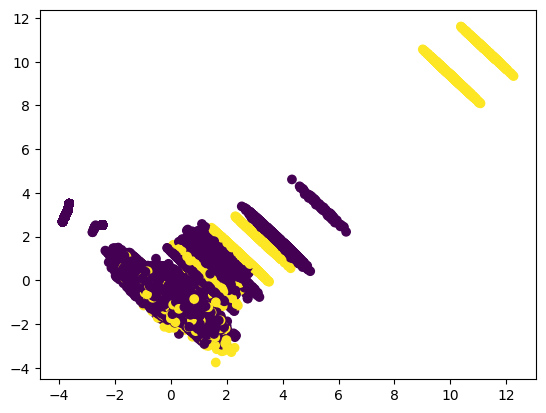

In [17]:
plt.scatter(x_after_pca_in_2D[:, 0], x_after_pca_in_2D[:, 1], c=df['label'].map({'Benign': 0, 'Malware': 1}))

In [18]:
pca = PCA()
pca.fit(ss.fit_transform(df[features_list].to_numpy()))

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"},
    range_y=(0.98, 1.02),
    title="SVD Explained Variance Ratio"
)

As we can see we can compress the data into 17 components without loosing any information.

## Train test split

In [19]:
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing

# We convert the feature list to a numpy array, this is required for the model fitting
X = df[features_list]#.to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(df[test_type])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(118995, 19) (118995,)
(25505, 19) (25505,)


Counter({'Benign': 128384,
         'XSS': 3335,
         'LOG4J': 1568,
         'Log Forging': 1627,
         'Cookie Injection': 3250,
         'SQL Injection': 3181,
         'RCE': 1593,
         'Directory Traversal': 1562})

In [45]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [46]:
pca = PCA(17)
pca.fit(X_train)
# x_train_pca = pca.transform(X_train)
# x_train_pca_real = pca.transform(X_train)
x_train_pca = X_train

In [47]:
# x_test_pca = pca.transform(X_test)
# x_test_pca_real = pca.transform(X_test)
x_test_pca = X_test

In [48]:
def plot_feature_importance(model):
    plt.figure(figsize=(10, 10))
    plt.title("Feature importances")
    plt.barh(range(x_train_pca.shape[1]), model.feature_importances_, align="center")
    plt.yticks(np.arange(x_train_pca.shape[1]), features_list)
    plt.ylim([-1, x_train_pca.shape[1]])
    plt.show()

In [ ]:
# Feature selection with Random Forest Classifier

rfc_fs = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_fs.fit(x_train_pca, y_train)

# Plot the feature importances of the forest
plot_feature_importance(rfc_fs)

In [ ]:
# Feature selection with AdaBoost Classifier

abc_fs = AdaBoostClassifier(n_estimators=100, random_state=42)
abc_fs.fit(x_train_pca, y_train)

# Plot the feature importances of the forest
plot_feature_importance(abc_fs)

In [ ]:
# Feature selection with Gradient Boosting Classifier

gbc_fs = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc_fs.fit(x_train_pca, y_train)

# Plot the feature importances of the forest
plot_feature_importance(gbc_fs)

In [ ]:
# Feature importance with Linear SVC
 
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x_train_pca, y_train)
lsvc.coef_

# Plot feature importance with Linear SVC
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.barh(range(x_train_pca.shape[1]), lsvc.coef_[0], align="center")
plt.yticks(np.arange(x_train_pca.shape[1]), features_list)
plt.ylim([-1, x_train_pca.shape[1]])
plt.show()


In [ ]:
# Feature selection with Decision Tree Classifier

dtc_fs = DecisionTreeClassifier(random_state=42)
dtc_fs.fit(x_train_pca, y_train)

plot_feature_importance(dtc_fs)

In [ ]:
# Feature selection with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

etc_fs = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc_fs.fit(x_train_pca, y_train)

plot_feature_importance(etc_fs)

In [ ]:
# Print the feature ranking - Top 10
fs_table = pd.DataFrame(columns=['Feature', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Linear SVC', 'Decision Tree', 'Extra Trees'])
fs_table['Feature'] = features_list
fs_table['Random Forest'] = rfc_fs.feature_importances_

fs_table['AdaBoost'] = abc_fs.feature_importances_
fs_table['Gradient Boosting'] = gbc_fs.feature_importances_
fs_table['Linear SVC'] = np.abs(lsvc.coef_[0])
fs_table['Decision Tree'] = dtc_fs.feature_importances_
fs_table['Extra Trees'] = etc_fs.feature_importances_

fs_table['Mean'] = fs_table.mean(axis=1)
fs_table.sort_values(by='Mean', ascending=False, inplace=True)
fs_table.head(15)

In [ ]:
# x_train_pca = x_train_pca[:, fs_table['Mean'].head(15).index]
# x_test_pca = x_test_pca[:, fs_table['Mean'].head(15).index]

/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/nonofurb

Optimal number of features : 11


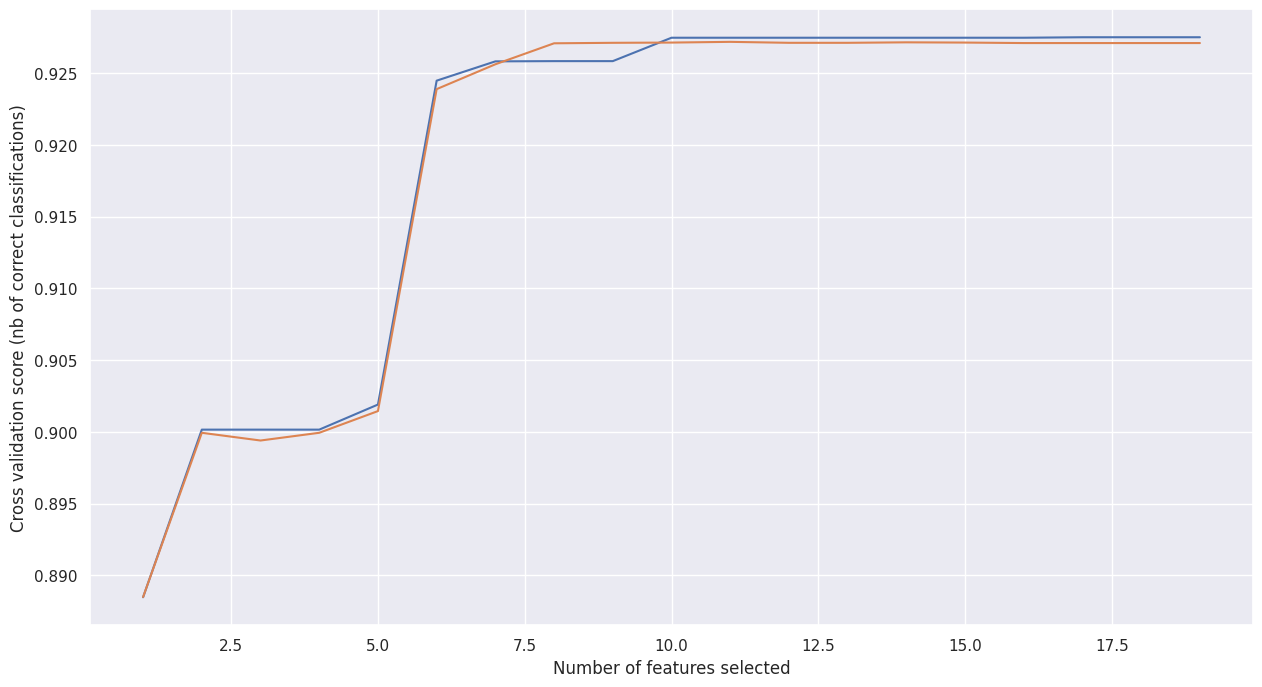

In [49]:
# Feature selection

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(x_train_pca, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

x_train_pca = rfecv.transform(x_train_pca)
x_test_pca = rfecv.transform(x_test_pca)

In [26]:
def create_grid_search(model, params):
    # Create a grid search object which is used to find the best hyperparameters for the model
    return GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, verbose=3, cv=3, scoring='accuracy', return_train_score=True)

In [27]:
# https://plotly.com/python/parallel-categories-diagram/

def plot_grid_search_results(results):

    df = pd.DataFrame(results)
    # Build parcats dimensions
    categorical_dimensions = [c for c in df.columns if "param_" in c]

    dimensions = [dict(values=df[label], label=label)for label in categorical_dimensions]

    # Build colorscale
    color = np.zeros(len(df), dtype='uint8')
    colorscale = [[0, 'gray'], [1, 'blue']]

    # Build figure as FigureWidget
    fig = go.FigureWidget(data=[go.Scatter(x=df['std_test_score'], y=df['mean_test_score'], marker={'color': 'gray'}, mode='markers', selected={'marker': {'color': 'blue'}}, unselected={'marker': {'opacity': 0.3}}), go.Parcats(domain={'y': [0, 0.4]}, dimensions=dimensions,line={'colorscale': colorscale, 'cmin': 0,'cmax': 1, 'color': color, 'shape': 'hspline'})])

    fig.update_layout(
        height=800, xaxis={'title': 'STD Score'},
        yaxis={'title': 'Mean Score', 'domain': [0.6, 1]},
        dragmode='lasso', hovermode='closest')

    # Update color callback
    def update_color(trace, points, state):
        # Update scatter selection
        fig.data[0].selectedpoints = points.point_inds

        # Update parcats colors
        new_color = np.zeros(len(df), dtype='uint8')
        new_color[points.point_inds] = 1
        fig.data[1].line.color = new_color

    # Register callback on scatter selection...
    fig.data[0].on_selection(update_color)
    # and parcats click
    fig.data[1].on_click(update_color)

    return fig

## Model choosing and fitting

In [28]:
# Random forest is an ensemble learning method that uses multiple decision trees to make predictions.
# It is a robust and flexible model that can handle high-dimensional and complex data,
# making it a good choice for API classification tasks.

rf = RandomForestClassifier()
rf_param = {
    "n_estimators": [150, 250, 750],
    "criterion": ["gini", "entropy"],
    "max_depth": [20],
    "min_samples_split": [2],
    "random_state": [43],
}
rf_gcv = create_grid_search(rf, rf_param)

In [29]:
rf_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 2/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=150, random_state=43;, score=(train=0.963, test=0.933) total time= 1.4min
[CV 1/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=150, random_state=43;, score=(train=0.961, test=0.933) total time= 1.5min
[CV 3/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=150, random_state=43;, score=(train=0.961, test=0.934) total time= 1.5min
[CV 1/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=0.961, test=0.933) total time= 2.5min
[CV 2/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=0.962, test=0.933) total time= 2.6min
[CV 3/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=0.961, test=0.933) total time= 2.6min
[CV 1/3] END criterion=entropy, ma

/home/nonofurbuisness/.local/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[CV 1/3] END criterion=entropy, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=0.972, test=0.933) total time= 3.8min
[CV 2/3] END criterion=entropy, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=0.972, test=0.933) total time= 3.7min
[CV 3/3] END criterion=entropy, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=0.972, test=0.933) total time= 3.6min
[CV 1/3] END criterion=entropy, max_depth=20, min_samples_split=2, n_estimators=750, random_state=43;, score=(train=0.972, test=0.934) total time= 9.7min
[CV 2/3] END criterion=entropy, max_depth=20, min_samples_split=2, n_estimators=750, random_state=43;, score=(train=0.972, test=0.933) total time= 9.3min
[CV 3/3] END criterion=entropy, max_depth=20, min_samples_split=2, n_estimators=750, random_state=43;, score=(train=0.972, test=0.934) total time= 9.2min


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [20],
                         'min_samples_split': [2],
                         'n_estimators': [150, 250, 750],
                         'random_state': [43]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [30]:
# plot_grid_search_results(rf_gcv.cv_results_)

In [31]:
print("Best parameters: ", rf_gcv.best_params_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 750, 'random_state': 43}


In [32]:
clf = rf_gcv.best_estimator_

In [34]:
# Save the model
filename = "Model/"+str(dataset_number)+"/rf"+str(dataset_number)+"_model.sav"
pickle.dump(clf, open(filename, 'wb'))

                     precision    recall  f1-score   support

             Benign    0.94239   0.98967   0.96545     22660
   Cookie Injection    1.00000   0.99826   0.99913       574
Directory Traversal    0.50000   0.00362   0.00719       276
              LOG4J    0.99324   0.53069   0.69176       277
        Log Forging    0.33333   0.00697   0.01365       287
                RCE    1.00000   0.15658   0.27077       281
      SQL Injection    0.66912   0.48663   0.56347       561
                XSS    0.81214   0.72666   0.76703       589

           accuracy                        0.93684     25505
          macro avg    0.78128   0.48738   0.53481     25505
       weighted avg    0.92421   0.93684   0.92108     25505



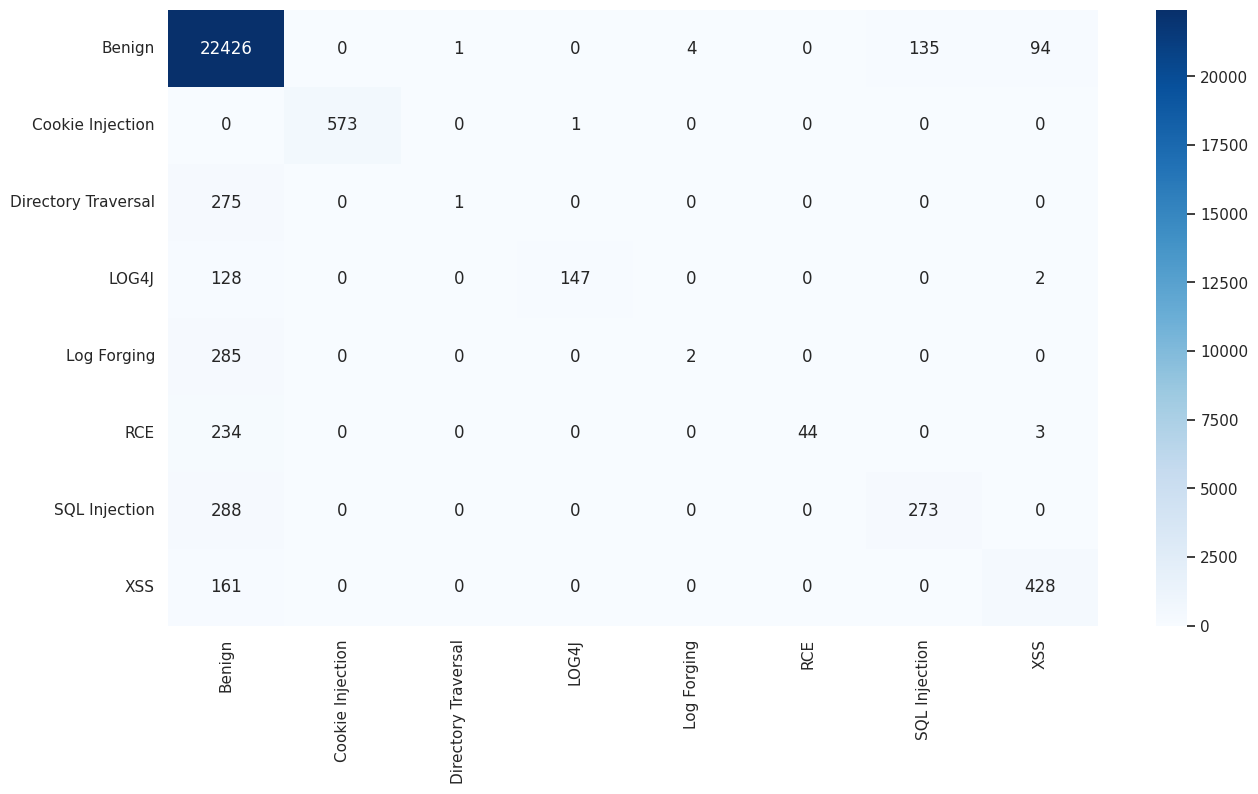

In [35]:
show(clf)

In [ ]:
# Support vector machines are a popular choice for classification tasks, including API classification.
# They work by finding the hyperplane in a high-dimensional space that maximally
# separates different classes of data points.

svc = SVC(cache_size=500)
svc_param = {
    "C": [1, 2, 3],
    "kernel": ["poly", "rbf"],
    "probability": [True],
}
svc_gcv = create_grid_search(svc, svc_param)

In [ ]:
svc_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(svc_gcv.cv_results_)

In [ ]:
print("Best parameters: ", svc_gcv.best_params_)

In [ ]:
svc = svc_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/svc"+str(dataset_number)+"_model.sav"
pickle.dump(svc, open(filename, 'wb'))

In [ ]:
show(svc)

In [ ]:
# Logistic regression is a simple yet effective linear model for classification tasks.
# It is particularly useful for predicting binary outcomes
# (e.g., malicious vs benign) and is often used as a baseline
# model for comparison with more complex models.

lr = LogisticRegression()
lr_param = {
    "C": [1, 2, 3],
    "penalty": ["l2"],
}
lr_gcv = create_grid_search(lr, lr_param)

In [ ]:
lr_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(lr_gcv.cv_results_)

In [ ]:
print("Best parameters: ", lr_gcv.best_params_)

In [ ]:
lr = lr_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/lr"+str(dataset_number)+"_model.sav"
pickle.dump(lr, open(filename, 'wb'))

In [ ]:
show(lr)

In [ ]:
# KNN is a simple yet effective classification algorithm that works by finding the k nearest neighbors of a data point.
# It is a non-parametric model that does not make any assumptions about the underlying data distribution.

knn = KNeighborsClassifier()
knn_param = {
    "n_neighbors": [3 ,4, 5, 7, 9, 11, 13, 15],
    "weights": ["uniform", "distance"],
}
knn_gcv = create_grid_search(knn, knn_param)

In [ ]:
knn_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(knn_gcv.cv_results_)

In [ ]:
print("Best parameters: ", knn_gcv.best_params_)

In [ ]:
knn = knn_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/knn"+str(dataset_number)+"_model.sav"
pickle.dump(knn, open(filename, 'wb'))

In [ ]:
show(knn)

In [ ]:
# Decision trees are a popular choice for classification tasks.
# They work by recursively partitioning the feature space into smaller and smaller regions,
# until each region contains only a single class of data points.

dt = DecisionTreeClassifier()
dt_param = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9, 11, 13, 15],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
}
dt_gcv = create_grid_search(dt, dt_param)

In [ ]:
dt_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(dt_gcv.cv_results_)

In [ ]:
print("Best parameters: ", dt_gcv.best_params_)

In [ ]:
dt = dt_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/dt"+str(dataset_number)+"_model.sav"
pickle.dump(dt, open(filename, 'wb'))

In [ ]:
show(dt)

In [ ]:
# AdaBoost is a popular ensemble method that works by combining the predictions of multiple weak learners.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

abc = AdaBoostClassifier()
abc_param = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    "learning_rate": [0.001, 0.01, 0.1, 1, 10, 100],
}
abc_gcv = create_grid_search(abc, abc_param)

In [ ]:
abc_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(abc_gcv.cv_results_)

In [ ]:
print("Best parameters: ", abc_gcv.best_params_)

In [ ]:
abc = abc_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/abc"+str(dataset_number)+"_model.sav"
pickle.dump(abc, open(filename, 'wb'))

In [ ]:
show(abc)

In [ ]:
# Gradient Boosting is a popular ensemble method that works by combining the predictions of multiple weak learners.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

gbc = GradientBoostingClassifier()
gbc_param = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    "learning_rate": [0.001, 0.01, 0.1, 1, 10, 100],
}
gbc_gcv = create_grid_search(gbc, gbc_param)

In [ ]:
gbc_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(gbc_gcv.cv_results_)

In [ ]:
print("Best parameters: ", gbc_gcv.best_params_)

In [ ]:
gbc = gbc_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/gbc"+str(dataset_number)+"_model.sav"
pickle.dump(gbc, open(filename, 'wb'))

In [ ]:
show(gbc)

In [ ]:
# Neural networks are a popular choice for classification tasks.
# They work by learning the weights of the connections between neurons in the network.

mlp = MLPClassifier()
mlp_param = {
    "hidden_layer_sizes": [(100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100), (100, 100, 100, 100, 100, 100)],
    "activation": ["relu"],
    "solver": ["adam"],
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1],
    "learning_rate": ["constant", "invscaling", "adaptive"],
    "early_stopping": [True],
}
mlp_gcv = create_grid_search(mlp, mlp_param)

In [ ]:
mlp_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(mlp_gcv.cv_results_)

In [ ]:
print("Best parameters: ", mlp_gcv.best_params_)

In [ ]:
mlp = mlp_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/mlp"+str(dataset_number)+"_model.sav"
pickle.dump(mlp, open(filename, 'wb'))

In [ ]:
show(mlp)

In [ ]:
# Voting classifier is a meta-classifier that combines the predictions of multiple classifiers.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

vc = VotingClassifier(estimators=[("clf",clf),("svc",svc),("lr",lr),("knn",knn),("dt",dt),("abc",abc),("gbc",gbc),("mlp",mlp)])
vc_param = {
    "weights": [[1,1,1,1,1,1,1,1], [2,1,1,1,1,1,1,1], [1,2,1,1,1,1,1,1], [1,1,2,1,1,1,1,1], [1,1,1,2,1,1,1,1], [1,1,1,1,2,1,1,1], [1,1,1,1,1,2,1,1], [1,1,1,1,1,1,2,1], [1,1,1,1,1,1,1,2]],
    "voting": ["hard", "soft"],
}
vc_gcv = create_grid_search(vc, vc_param)

In [ ]:
vc_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(vc_gcv.cv_results_)

In [ ]:
print("Best parameters: ", vc_gcv.best_params_)

In [ ]:
vc = vc_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/vc"+str(dataset_number)+"_model.sav"
pickle.dump(vc, open(filename, 'wb'))

In [ ]:
show(vc)

In [ ]:
# Stacking classifier is a meta-classifier that combines the predictions of multiple classifiers.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

sc = StackingClassifier(estimators=[("clf",clf),("svc",svc),("lr",lr),("knn",knn),("dt",dt),("abc",abc),("gbc",gbc),("mlp",mlp)], final_estimator=LogisticRegression())
sc_param = {
    "final_estimator__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}
sc_gcv = create_grid_search(sc, sc_param)

In [ ]:
# Print size of x_train_pca
print(x_train_pca.shape)


In [ ]:
sc_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(sc_gcv.cv_results_)

In [ ]:
print("Best parameters: ", sc_gcv.best_params_)

In [ ]:
sc = sc_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/sc"+str(dataset_number)+"_model.sav"
pickle.dump(sc, open(filename, 'wb'))

In [ ]:
show(sc)

In [ ]:
# Choose the best model

models = [clf,svc,lr,knn,dt,abc,gbc,mlp,vc,sc]
model_names = ["Random Forest","SVM","Logistic Regression","KNN","Decision Tree","AdaBoost","Gradient Boosting","Neural Network","Voting Classifier","Stacking Classifier"]
model_scores = []

for model in models:
    predictions = model.predict(x_test_pca)
    true_labels = y_test
    model_report = classification_report(true_labels, predictions, digits=5)
    model_scores.append(model_report.split()[12])

best_model = models[model_scores.index(max(model_scores))]
best_model_name = model_names[model_scores.index(max(model_scores))]
best_model_score = max(model_scores)
print("Best model: " + best_model_name)
print("Score: " + str(best_model_score))
model_report = classification_report(true_labels, predictions, digits=5)
print(model_report)

## Result printout

In [2]:
def show(model):
    # We print our results
    sns.set(rc={'figure.figsize': (15, 8)})
    predictions = model.predict(x_test_pca)
    true_labels = y_test
    cf_matrix = confusion_matrix(true_labels, predictions)
    model_report = classification_report(true_labels, predictions, digits=5)
    heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))

    # The heatmap is cool but this is the most important result
    print(model_report)

# Test

In [59]:
# Now it's your turn, use the model you have just created :)

# Read the valuation json, preprocess it and run your model
with open(f'./dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset, remember that here you don't have the labels
test_df.fillna(' ', inplace=True)
test_df = vectorize_df(test_df)

# Predict with your model and use rfecv to select the best features
X = test_df[features_list].to_numpy()
X = rfecv.transform(X)
predictions = clf.predict(X)

# Save your predictions

In [69]:
# Save your preditions
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt', enc.fit_transform(predictions), fmt='%2d')